#**Week 8 - Gradient Boosting**

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. How are the targets calculated? The target outcome for each case in the data depends on how much changing that case's prediction impacts the overall prediction error

#**What is the difference between Bagging and Bossting**

###**Bagging**

Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result, we get an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree classifier.

###**Boosting**

Boosting is used to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analysing data for errors. Consecutive trees (random sample) are fit and at every step, the goal is to improve the accuracy from the prior tree. When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. This process converts weak learners into better performing model.

#####**For more detailed comparison click [here](https://analyticsindiamag.com/primer-ensemble-learning-bagging-boosting/#:~:text=Bagging%20is%20a%20way%20to,based%20on%20the%20last%20classification.)**

#**Dataset**

We have taken the bank churn data which is present on Kaggle
Dataset .We have considered only some columns for this notebook

To access the data click [here](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers):


In [ ]:
import pandas as pd 
import warnings
import pandas.util.testing as tm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder


In [ ]:
df_train=pd.read_csv('train.csv')

In [ ]:
df_train.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

df_train.drop(columns=['CustomerId'],inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


##**Data Visulaization**

Now we will do some visualization stuff to get some idea about our dataset

You can learn about seabron library from below links

[Link 1](https://www.geeksforgeeks.org/seaborn-categorical-plots/)

[Link 2](https://medium.com/analytics-vidhya/categorical-plots-in-seaborn-748a5b291679)

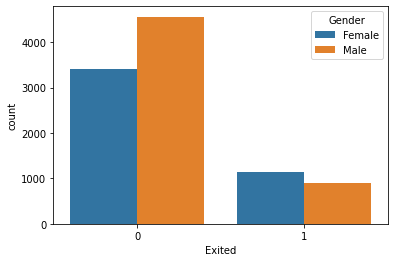

In [ ]:
sns.countplot(x= df_train['Exited'],hue=df_train['Gender'])

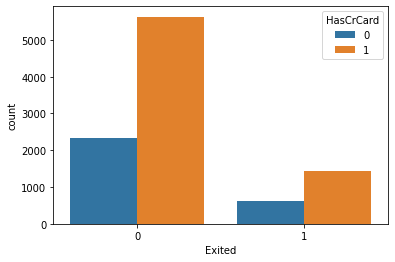

In [ ]:
sns.countplot(x= df_train['Exited'],hue=df_train['HasCrCard'])

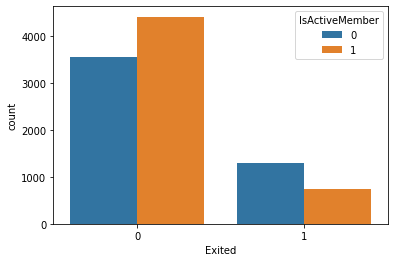

In [ ]:
sns.countplot(x=df_train['Exited'],hue=df_train['IsActiveMember'])

To deal with categorical varibles we will use the Label Encoder

In [ ]:
lb =LabelEncoder()

In [ ]:
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_train['Gender'] =lb.fit_transform(df_train['Gender'])

In [ ]:
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
scol=[]

In [ ]:
for i in df_train.columns:
  scol.append(i)

In [ ]:
sc=StandardScaler()

We will normalize the data using Standard Scaler 

By following the given [link](https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set) you can get an idea baout implementation of the Standard Scaler

In [ ]:
scaled_features=df_train.copy()

In [ ]:
features =scaled_features[scol]

In [ ]:
scaler =StandardScaler().fit(features.values)

In [ ]:
features=scaler.transform(features.values)
scaled_features[scol]=features

In [ ]:
scaled_features.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


In [ ]:
X=scaled_features.iloc[:,:-1]

In [ ]:
y=df_train.iloc[:,-1]

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 9)
(2000, 9)
(8000,)
(2000,)


In [ ]:

clf =LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yp=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,yp)

0.809

In [ ]:
f1_score(y_test,yp)

0.30036630036630035

In [ ]:
adaclf =AdaBoostClassifier()
adaclf.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
yada=adaclf.predict(X_test)

In [ ]:
accuracy_score(y_test,yada)

0.8445

In [ ]:
f1_score(yada,y_test)

0.5392592592592593

You can learn more about Gradient Boosting from [here](https://mlcourse.ai/articles/topic10-boosting/)

In [ ]:
gbclf=GradientBoostingClassifier()
gbclf.fit(X_train,y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
ypg= gbclf.predict(X_test)

In [ ]:
accuracy_score(y_test,ypg)

0.856

In [ ]:
f1_score(y_test,ypg)

0.5471698113207547

In [ ]:
!pip install xgboost

To learn more about XGboost [Click here](https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5)

In [ ]:
D_train =xgb.DMatrix(X_train,label=y_train)
D_test =xgb.DMatrix(X_test,label=y_test)

In [ ]:
param ={
    'eta':0.3,
    'max_depth':3,
    'num_class':2
}
steps=20

In [ ]:
xgbmodel = xgb.train(param,D_train,steps)

In [ ]:
yxgb=xgbmodel.predict(D_test)

In [ ]:
accuracy_score(yxgb,y_test)

0.859

In [ ]:
f1_score(y_test,yxgb)

0.5392156862745098